## Dataset used: "Carbonmonitor Europ Datas"
https://figshare.com/articles/dataset/Carbon_Monitor_Europe_a_near-real-time_and_country-level_monitoring_of_daily_CO2_emissions_for_European_Union_and_the_United_Kingdom/20219024

This dataset is about daily CO₂ emissions across European countries, broken down by economic sectors, over several years (from ~2019 to 2026 in your version).
As our first step we gona start by importing libraries we will use:
##### pandas, seaborn and matplotlib

### Problem Definition / Research Questions:
* RQ 1: How did COVID-19 lockdowns affect CO₂ emissions across Europe, especially in transport and aviation sectors?
* RQ 2: Which countries consistently emit the most CO₂, and how do their sectoral emission profiles differ?
* RQ 3: Are there seasonal patterns in CO₂ emissions, and which sectors or countries are most affected?

In [4]:
# Import Statements

import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

Next is to load the dataset we are going to use and checking what it includes inside:

In [5]:
# Load in dataset

carbon_df = pd.read_csv('data/carbonmonitor-eu_datas.csv')
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431334 entries, 0 to 431333
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   country     431334 non-null  object 
 1   date        431334 non-null  object 
 2   sector      431334 non-null  object 
 3   value       431334 non-null  float64
 4   Unnamed: 4  0 non-null       float64
dtypes: float64(2), object(3)
memory usage: 16.5+ MB


As we can see there are 4 unique columns and one EMPTY column "Unnamed: 4", so the next thing we gona do is deleting empty column and converting the Dtype of the "date" column into more appropriate "datetime" form so we can divide it into years, months and days respectively for further manipulations:

In [6]:
# Deleting "Unnamed: 4" column with .drop function
carbon_df.drop('Unnamed: 4',axis= 1, inplace=True)

# Converting object into datatime and separating the column
carbon_df['date'] = pd.to_datetime(carbon_df['date'], errors='coerce')  
carbon_df['year'] = carbon_df['date'].dt.year
carbon_df['month'] = carbon_df['date'].dt.month
carbon_df['day'] = carbon_df['date'].dt.day

By using pandas "grouby" function we can get total amount of CO2 emissioned by country per day and use this information to calculate how much percent of total CO2 emission is caused by specific country in certain sector.

In [7]:
# Grouping carbon_df coulumns "country" and "date", and summing the "value" elements

carbon_df['Total Country Daily'] = carbon_df.groupby(['country', 'date'])['value'].transform('sum')
carbon_df['Sector Share Percent'] = 100 * carbon_df['value'] / carbon_df['Total Country Daily']
carbon_df['Total Country'] = carbon_df.groupby('country')['value'].transform('sum')

# Display first 5 rows of our Dataset
carbon_df.head()


,country,date,sector,value,year,month,day,Total Country Daily,Sector Share Percent,Total Country
0,Norway,2019-01-01,Power,0.006542,2019.0,1.0,1.0,0.098426,6.646723,235.441619
1,Norway,2019-02-01,Power,0.005956,2019.0,2.0,1.0,0.095958,6.206455,235.441619
2,Norway,2019-03-01,Power,0.006048,2019.0,3.0,1.0,0.099696,6.066550,235.441619
3,Norway,2019-04-01,Power,0.005940,2019.0,4.0,1.0,0.100088,5.934585,235.441619
4,Norway,2019-05-01,Power,0.005649,2019.0,5.0,1.0,0.096659,5.844528,235.441619


## Graph ploting:

 ### 1. Line Plot – CO2 Emissions in Germany Over Time
It shows daily CO2 emissions in Germany from 2019 to 2026.


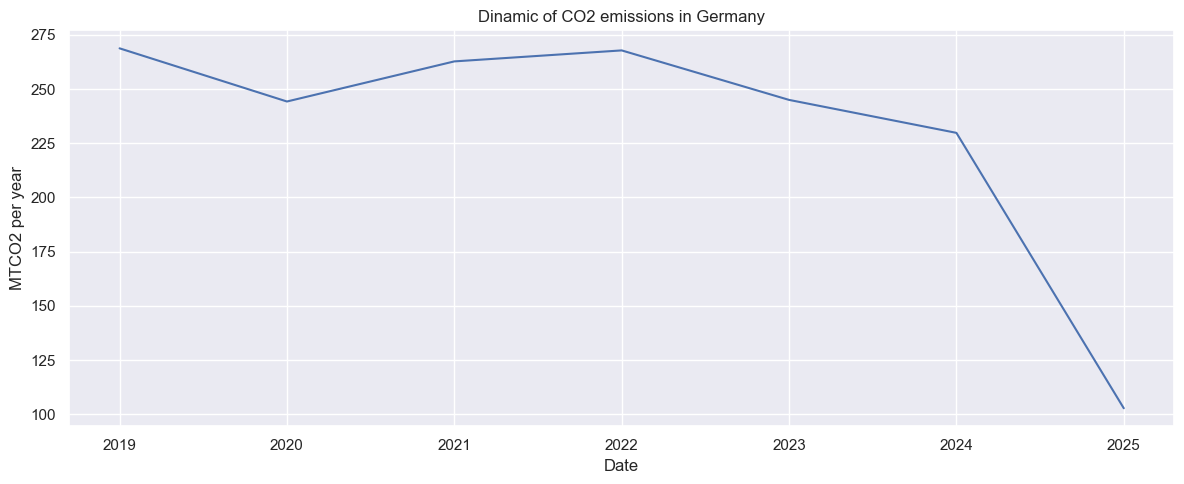

In [8]:
# Filtering the dataset for country == "Germany"
germany_df = carbon_df[carbon_df['country'] == 'Germany']

# Grouping by "year" and summing emissions across sectors
daily_sum = germany_df.groupby('year')['value'].sum()

# Plottign as a line chart with years on the x-axis and million tons of emissions on the y-axis
plt.figure(figsize=(12, 5))
daily_sum.plot()
plt.title("Dinamic of CO2 emissions in Germany")
plt.xlabel("Date")
plt.ylabel("MTCO2 per year")
plt.grid(True)
plt.tight_layout()


#2

C:\Users\saidt\AppData\Local\Temp\ipykernel_22916\2314698701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg.values, y=country_avg.index, palette="Reds_r")


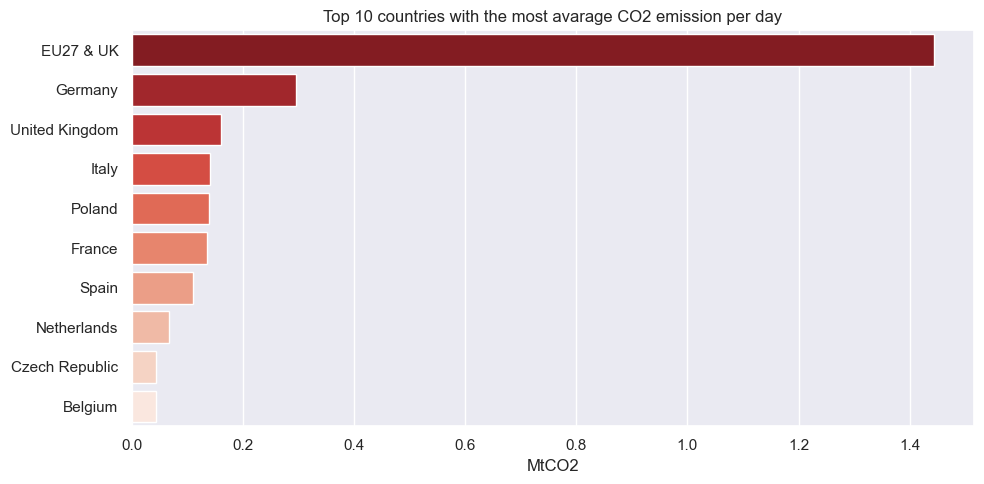

In [9]:
country_avg = carbon_df.groupby('country')['value'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_avg.values, y=country_avg.index, palette="Reds_r")
plt.title("Top 10 countries with the most avarage CO2 emission per day")
plt.xlabel("MtCO2")
plt.ylabel(None)
plt.tight_layout()


#3

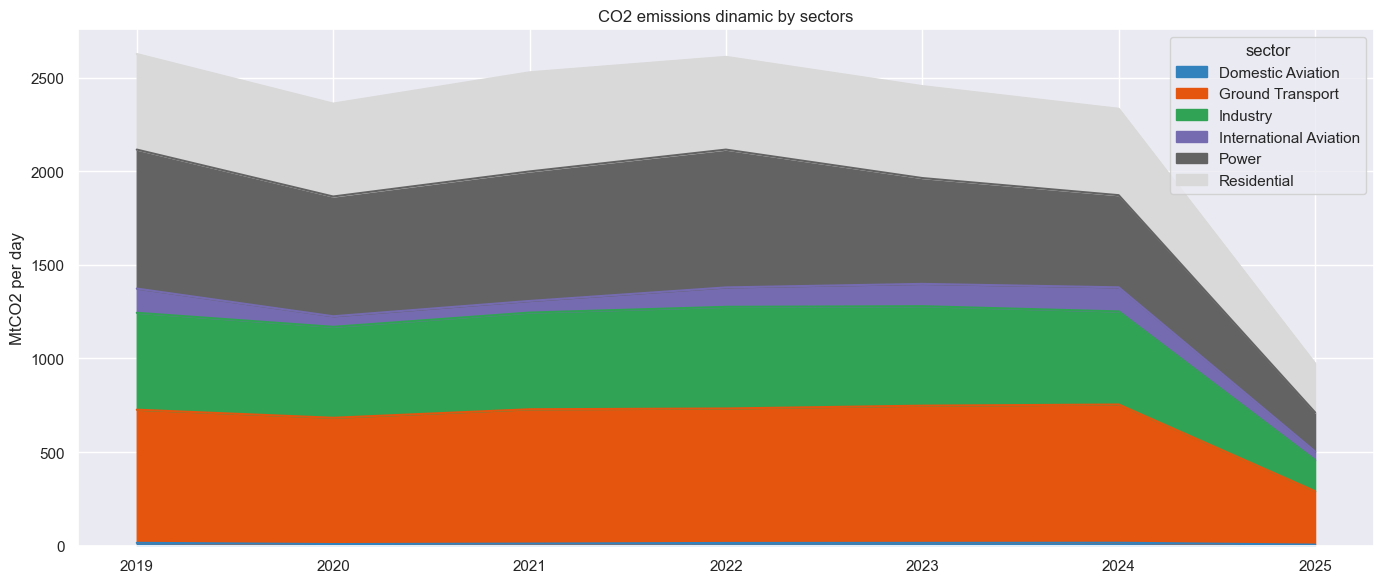

In [10]:
pivot = carbon_df.groupby(['year', 'sector'])['value'].sum().unstack()

pivot.plot.area(figsize=(14, 6), colormap='tab20c')
plt.title("CO2 emissions dinamic by sectors")
plt.ylabel("MtCO2 per day")
plt.xlabel(None)
plt.tight_layout()
plt.show()


#4

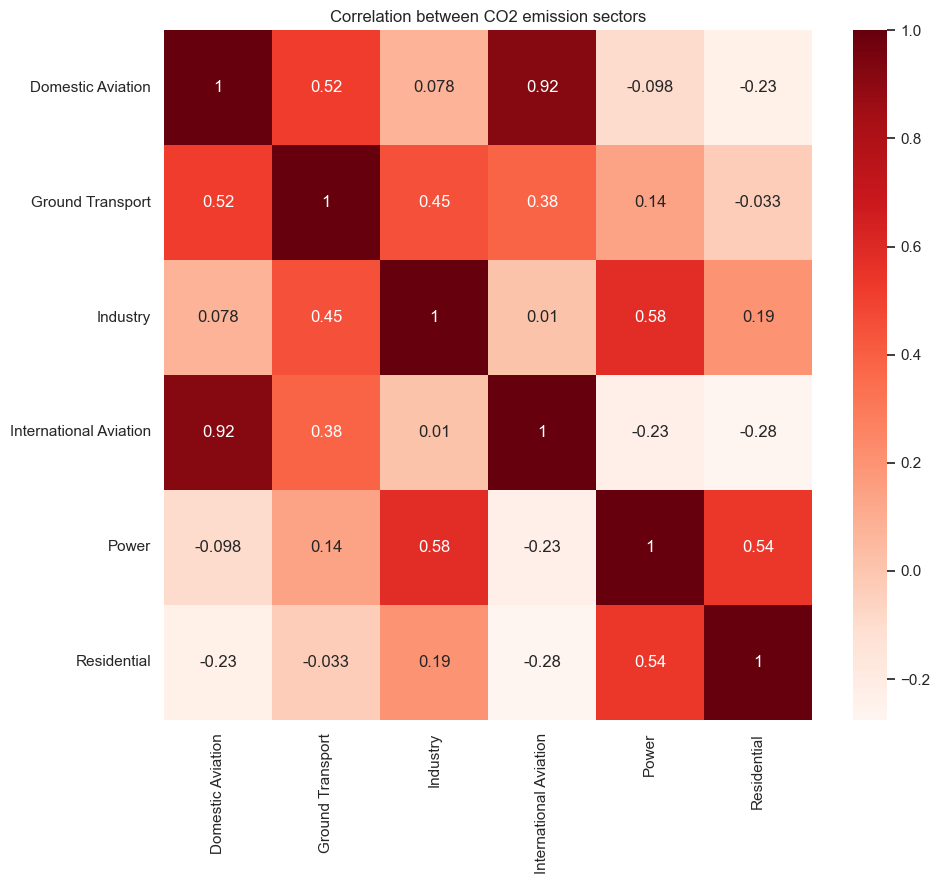

In [11]:
pivot = carbon_df.pivot_table(index='date', columns='sector', values='value').corr()

plt.figure(figsize=(10, 9))
sns.heatmap(pivot, annot=True, cmap='Reds')
plt.title("Correlation between CO2 emission sectors")
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
